[[   1.    1.    1.    1.    1.]
 [   1.    2.    4.    8.   16.]
 [   1.    3.    9.   27.   81.]
 [   1.    4.   16.   64.  256.]
 [   1.    5.   25.  125.  625.]]
[ -73.          146.25        -91.04166667   22.75         -1.95833333]
2.01948391737e-26


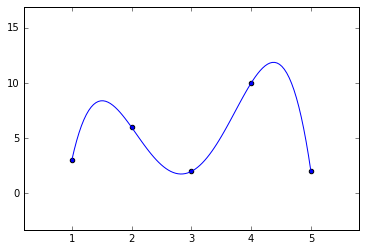

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def evalp(x,c):
    d = len(c)-1
    p = c[0]
    xp = 1.0
    for i in range(d):
        xp *= x
        p += c[i+1]*xp
    return p

def buildVmatrix(x):
    d = len(x)-1
    A = np.zeros((len(x),d+1))
    for i in range(len(x)):
        for j in range(d+1):
            A[i,j] = x[i]**j
    return A

def PolynomialInterpolation(x,y):
    A = buildVmatrix(x)
    c = np.linalg.solve(A,y)
    return c

def drawPolynomial(x,y,c,N,xmin,xmax):
    delta = (xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta
        px[i] = xp
        py[i] = evalp(xp,c)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-0.2*deltax, xmax+0.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 
d = 4

A = buildVmatrix(x)
print(A)

c = PolynomialInterpolation(x,y)
print(c)

erro = np.linalg.norm(A.dot(c)-y)**2
print(erro)


drawPolynomial(x,y,c,100,min(x),max(x))



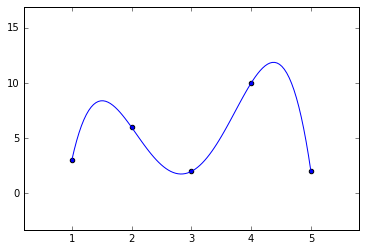

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def evalLagrangePolynomial(x,xp,yp):
    n = len(xp)
    p = 0.0
    for i in range(n):
        Lin = 1.0
        for j in range(n):
            if (i != j):
                Lin *= (x-xp[j])
        Lid = 1.0
        for j in range(n):
            if (i != j):
                Lid *= (xp[i]-xp[j])
        Li = Lin/Lid
        p += y[i]*Li
    return p


def drawLagrangePolynomial(x,y,N,xmin,xmax):
    delta = (xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta
        px[i] = xp
        py[i] = evalLagrangePolynomial(xp,x,y)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-0.2*deltax, xmax+0.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.0,2.0,3.0,4.0,5.0]
y = [3.0,6.0,2.0,10.0,2.0] 


drawLagrangePolynomial(x,y,100,min(x),max(x))


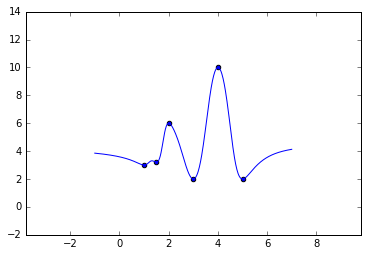

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

def evalSheppard(x,xp,yp,k):
    n  = len(xp)
    s  = np.zeros(n)
    wt = 0.0
    for i in range(n):
        if (x == xp[i]):
            return yp[i]
        s[i] = 1.0/((abs(x-xp[i])))**k
        wt += s[i]
    p = 0.0
    for i in range(n):
        p += yp[i]*(s[i]/wt)
    return p

def drawSheppard(x,y,k,N,xmin,xmax):
    delta = 2.0*(xmax-xmin)/(N-1.0)
    px = np.zeros(N)
    py = np.zeros(N)
    for i in range(N):
        xp = xmin + i*delta - N*delta/4.0
        px[i] = xp
        py[i] = evalSheppard(xp,x,y,k)
    plt.scatter(x,y)
    plt.plot(px,py)
    deltax = xmax - xmin
    plt.xlim(xmin-1.2*deltax, xmax+1.2*deltax)
    ymin = min([min(y),min(py)])
    ymax = max([max(y),max(py)])
    deltay = (ymax-ymin)
    plt.ylim(ymin-0.5*deltay,ymax+0.5*deltay)
    plt.show()

x = [1.0,1.5,2.0,3.0,4.0,5.0]
y = [3.0,3.2,6.0,2.0,10.0,2.0] 


drawSheppard(x,y,2,500,min(x),max(x))
